# ENV

<a target="_blank" href="https://colab.research.google.com/github/ares2012/temp/blob/master/Open_in_Colab.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

https://openincolab.com

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### API_KEY

In [ ]:
import os
import json

import numpy as np
import pandas as pd

In [ ]:
cp -r /content/drive/MyDrive/Colab\ Notebooks/my_list.txt /content

In [ ]:
file_path = '/content/my_list.txt'

with open(file_path, 'r') as f:
  keys = json.load(f)

oKEY = keys['OPENAI_API_KEY']
pKEY = keys['PINECONE_API_KEY']
hKEY = keys['huggingface.co']

In [ ]:
!pip install openai --upgrade --quiet

##### Successfully installed transformers-4.57.3


* pip install captum bitsandbytes llmlingua
* pip install --upgrade transformers



In [2]:
# 세션 다시 시작
! pip install captum bitsandbytes llmlingua

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 116.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is

In [ ]:
# pip install pycuda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 8.6 MB/s eta 0:00:00
  Created wheel for pycuda: filename=pycuda-2025.1.2-cp312-cp312-linux_x86_64.whl size=659050 sha256=ee548f4308b26422470b87a63a0665d0c89ecd1a7c21f533ff3f9037d8ca5e43
  Stored in directory: /root/.cache/pip/wheels/d5/36/f3/ac5f09d768cad3fa15d5a3449bdfe65c3de58e69d036c73228
Successfully built pycuda


In [ ]:
# pip install --upgrade transformers

In [ ]:
# pip install transformers==4.57.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 141.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.2
    Uninstalling transformers-4.57.2:
      Successfully uninstalled transformers-4.57.2


# CDS


In [1]:
import os
import torch

import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import random
from tqdm import tqdm

from datasets import load_dataset
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import AutoConfig, BitsAndBytesConfig
from captum.attr import LayerIntegratedGradients, IntegratedGradients

In [2]:
os.environ["PYTORCH_CUDA_ALLOC_CON"] = "expandable_segments:True"
#os.environ["PYTORCH_NO_CUDA_MEMORY_CACHING"] = "1"
#os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [ ]:
# ! cp /content/drive/MyDrive/ColabNotebooks/hub/models--microsoft--Phi-3-mini-128k-instruct/snapshots/072cb7562cb8c4adf682a8e186aaafa49469eb5d/configuration_phi3.py /content/drive/MyDrive/ColabNotebooks/hub/models--microsoft--Phi-3-mini-4k-instruct/snapshots/f39ac1d28e925b323eae81227eaba4464caced4e

In [ ]:
# ! cp /content/drive/MyDrive/ColabNotebooks/hub/models--microsoft--Phi-3-mini-128k-instruct/snapshots/072cb7562cb8c4adf682a8e186aaafa49469eb5d/modeling_phi3.py /content/drive/MyDrive/ColabNotebooks/hub/models--microsoft--Phi-3-mini-4k-instruct/snapshots/f39ac1d28e925b323eae81227eaba4464caced4e

In [3]:

# ==========================================
# 0. 환경 설정 및 엣지 모델 로드 로컬 (1분)
# ==========================================
torch.cuda.empty_cache()
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

#model_name = "microsoft/Phi-3-mini-128k-instruct" #(1분, 57초/3.6G)
##model_name = "microsoft/Phi-3-mini-4k-instruct" #(4분, 52초)
model_name = "Qwen/Qwen3-0.6B" #Instruct (25초/1.3G, 6초/3.5G)
##model_name = "Qwen/Qwen3-0.6B-Base" #(25초/1.3G, 6초/3.5G)
#model_name = "Qwen/Qwen3-4B-Instruct-2507" #(25초/1.3G, 6초/3.5G)
local_path = '/content/drive/MyDrive/ColabNotebooks/hub/'

# Construct the path to the model's base directory in the hub
model_base_dir = os.path.join(local_path, "models--" + model_name.replace("/", "--"))

# Construct the path to the snapshots directory
snapshots_dir = os.path.join(model_base_dir, "snapshots")

# Dynamically get the snapshot hash (assuming there's only one subdirectory in snapshots)
if os.path.exists(snapshots_dir):
    snapshot_hashes = os.listdir(snapshots_dir)
    if snapshot_hashes:
        snapshot_hash = snapshot_hashes[0] # Take the first one found
        # Construct the full local path to the model directory including the dynamically found snapshot hash
        local_model_dir = os.path.join(snapshots_dir, snapshot_hash)
    else:
        raise FileNotFoundError(f"No snapshot hashes found in {snapshots_dir}")
else:
    raise FileNotFoundError(f"Snapshots directory not found: {snapshots_dir}")
print(f"Loading model from: {local_model_dir}")

# Explicitly load the configuration first
config = AutoConfig.from_pretrained(local_model_dir, trust_remote_code=True, local_files_only=True, output_attentions=True)
print(f"Type of config after loading: {type(config)}") # Debugging line

tokenizer = AutoTokenizer.from_pretrained(# model_name,
    local_model_dir, # Use the direct local path
    config=config, # Pass the loaded config
    #trust_remote_code=True
)
print(f"tokenizer.vocab_files_names: {tokenizer.vocab_files_names}")

bnb_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_compute_dtype=torch.float16,
        bnb_4bit_use_double_quant=True,
)
model = AutoModelForCausalLM.from_pretrained(# model_name,
        local_model_dir, # Use the direct local path
        config=config, # Pass the loaded config
        quantization_config=bnb_config,
        device_map="auto",
        trust_remote_code=True,
        attn_implementation="eager",
        #output_attentions=True,
        local_files_only = True # Ensure local files are used
)
# This globally disables the problematic caching mechanism.
model.config.use_cache = False



Loading model from: /content/drive/MyDrive/ColabNotebooks/hub/models--Qwen--Qwen3-0.6B/snapshots/c1899de289a04d12100db370d81485cdf75e47ca
Type of config after loading: <class 'transformers.models.qwen3.configuration_qwen3.Qwen3Config'>
tokenizer.vocab_files_names: {'vocab_file': 'vocab.json', 'merges_file': 'merges.txt', 'tokenizer_file': 'tokenizer.json'}


The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


In [ ]:
import gc
gc.collect(); torch.cuda.empty_cache()

torch.cuda.memory_reserved(0), torch.cuda.memory_allocated(0), torch.cuda.get_device_properties(0).total_memory

(0, 0, 15828320256)

In [ ]:
torch.cuda.mem_get_info(), torch.cuda.mem_get_info()[0]

((14386593792, 15828320256), 14386593792)

##### 프롬프트


* apply chat model
* context+question



In [7]:
# ==========================================
# 1. XAI: IG 분석 및 CDS 계산
# ==========================================
from captum.attr import IntegratedGradients
#from torch.cuda import AcceleratorError
#import pycuda.driver as cuda
def get_phi3_token_importance(context, question, model, tokenizer):
    # 명시적인 구조를 가진 프롬프트 생성 (Separator 감지 용이)
    # Phi-3 템플릿 + 명확한 구분자
    full_text = f"<|user|>\nContext:\n{context}\n\nQuestion:\n{question}\n\nAnswer based on the context:<|end|>\n<|assistant|>"

    # 0. 입력 ID 추출
    torch.cuda.empty_cache()
    inputs = tokenizer(full_text, return_tensors="pt", add_special_tokens=False).to(DEVICE)
    input_ids = inputs.input_ids
    torch.cuda.empty_cache()

    # 1. Raw Attention 추출 (Forward Pass)
    with torch.no_grad():
      #output = model(**inputs)#; print(type(output))
      output = model(input_ids, output_attentions=True) #  Attention만 추출
      # 마지막 레이어의 어텐션 (Batch, Head, Seq, Seq) -> Head 평균 -> (Seq, Seq)
      raw_attn = output.attentions[-1][0].mean(dim=0).cpu().numpy()
      #raw_attn = output.attentions[0][0].mean(dim=0).cpu().numpy()

    torch.cuda.empty_cache()
    # 2. 임베딩 레이어 찾기
    if hasattr(model, "model") and hasattr(model.model, "embed_tokens"):
        embedding_layer = model.model.embed_tokens
    elif hasattr(model, "embed_tokens"): # Llama/Gemma 일부
        embedding_layer = model.embed_tokens
    else:
        embedding_layer = model.get_input_embeddings()

    torch.cuda.empty_cache()
    # 3. 임베딩 벡터를 미리 계산 > Captum의 Input
    # (4-bit 모델 등에서 Gradient 계산을 위해 requires_grad 설정이 필요할 수 있음)
    input_embeddings = embedding_layer(input_ids)

    torch.cuda.empty_cache()
    # 4. Forward 함수 정의 (임베딩을 입력으로 받음)
    def forward_func(inputs_embeds):
        # inputs_embeds를 모델에 직접 주입
        #outputs = model(inputs_embeds=inputs_embeds)
        outputs = model(inputs_embeds=inputs_embeds, output_attentions=False) # attention 비활성화
        #return outputs.logits[0, -1, :].max().unsqueeze(0)
        return outputs.logits[0, -1].max().unsqueeze(0)

    try:
        # 5. [변경] LayerIntegratedGradients -> IntegratedGradients
        # 레이어가 아니라 '입력 텐서(input_embeddings)' 자체를 분석 대상으로 함
        ig = IntegratedGradients(forward_func)

        torch.cuda.empty_cache()
        # 6. 속성(Attribute) 계산
        attributions, delta = ig.attribute(
            inputs=input_embeddings,
            # Baseline은 0 벡터 (All-zero embeddings)
            baselines=torch.zeros_like(input_embeddings),
            n_steps=1,
            internal_batch_size=1, # 한 번에 1개 단계씩만 계산하여 메모리 절약
            return_convergence_delta=True
        )
    except RuntimeError as e:
    #except (AcceleratorError, RuntimeError) as e:
    #except (cuda.Error, MemoryError, RuntimeError) as e:
      if "out of memory" in str(e):
        #del attributions, delta, inputs, input_ids, input_embeddings
        torch.cuda.empty_cache()
        print("Skipping sample due to OOM.")
        torch.cuda.empty_cache()
        return None, None, None, None
      else:
        raise e

    # 7. 중요도 점수 합산 (L2 Norm)
    scores = torch.norm(attributions, dim=-1).squeeze().tolist()
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

    # 8. CDS 계산 (Context 영역: 'Question:' 전까지)
    try:
        # 토큰 중 'Question' 문자열을 포함하는 인덱스 찾기
        sep_idx = next(i for i, t in enumerate(tokens) if "Question" in t)
        context_score = sum(scores[:sep_idx])
        total_score = sum(scores)
        cds = context_score / total_score if total_score > 0 else 0
    except StopIteration:
        cds = 0.5 # 구분자 못 찾음
        sep_idx = len(tokens) // 2

    del attributions, delta, inputs, input_ids, input_embeddings, output
    torch.cuda.empty_cache()
    #print(tokens, scores, cds, raw_attn)

    return tokens, scores, cds, raw_attn

In [4]:
import torch
from captum.attr import IntegratedGradients

MAX_CHUNK_TOKENS = 1024   # 너무 크면 IG에서 OOM → chunk 단위로 처리
DEVICE = "cuda"

def chunk_tokens(input_ids, chunk_size=MAX_CHUNK_TOKENS):
    chunks = []
    for i in range(0, len(input_ids), chunk_size):
        chunks.append(input_ids[i:i + chunk_size])
    return chunks

def get_phi3_token_importance(context, question, model, tokenizer):
    """
    길이 5000 이상의 문서에서도 OOM이 발생하지 않도록
    입력을 Chunk 단위로 잘라 IG 계산을 수행하는 버전.
    """

    full_text = (
        "<|user|>\nContext:\n" +
        context +
        "\n\nQuestion:\n" +
        question +
        "\n\nAnswer based on the context:<|end|>\n<|assistant|>"
    )

    # -------------------------------------------------------
    # 1. 토크나이징 (CPU 유지)
    # -------------------------------------------------------
    torch.cuda.empty_cache()
    inputs = tokenizer(full_text, return_tensors="pt", add_special_tokens=False)
    input_ids = inputs.input_ids[0].tolist()  # list 로 변환하여 CPU 유지

    # 매우 긴 경우 chunk로 분리
    token_chunks = chunk_tokens(input_ids, MAX_CHUNK_TOKENS)

    # 전체 결과 저장용
    all_tokens = []
    all_scores = []
    all_raw_attn = []

    # -------------------------------------------------------
    # 2. Attention 추출 (Chunk 단위)
    # -------------------------------------------------------
    for c_idx, chunk in enumerate(token_chunks):
        input_tensor = torch.tensor(chunk, dtype=torch.long).unsqueeze(0).to(DEVICE)

        with torch.no_grad():
            out = model(input_tensor, output_attentions=True)
            raw_attn = out.attentions[-1][0].mean(dim=0).cpu().numpy()
            all_raw_attn.append(raw_attn)

        # GPU 메모리 즉시 비우기
        del out, input_tensor
        torch.cuda.empty_cache()

    # -------------------------------------------------------
    # 3. 임베딩 레이어 가져오기
    # -------------------------------------------------------
    if hasattr(model, "model") and hasattr(model.model, "embed_tokens"):
        embedding_layer = model.model.embed_tokens
    elif hasattr(model, "embed_tokens"):
        embedding_layer = model.embed_tokens
    else:
        embedding_layer = model.get_input_embeddings()

    # -------------------------------------------------------
    # 4. Chunk 단위 IG 계산
    # -------------------------------------------------------
    for c_idx, chunk in enumerate(token_chunks):

        # 토큰 → 텐서
        ids_tensor = torch.tensor(chunk, dtype=torch.long).unsqueeze(0).to(DEVICE)

        # 임베딩 계산
        input_embeds = embedding_layer(ids_tensor)

        # Forward 함수 (embedding 기반)
        def forward_func(embeds):
            out = model(inputs_embeds=embeds, output_attentions=False)
            return out.logits[0, -1].max().unsqueeze(0)

        ig = IntegratedGradients(forward_func)

        try:
            attributions, delta = ig.attribute(
                inputs=input_embeds,
                baselines=torch.zeros_like(input_embeds),
                n_steps=1,
                internal_batch_size=1,
                return_convergence_delta=True
            )
        except RuntimeError as e:
            if "out of memory" in str(e):
                torch.cuda.empty_cache()
                print("Chunk", c_idx, "IG skipped due to OOM")
                continue
            else:
                raise e

        # L2 Norm 기반 중요도 계산
        scores = torch.norm(attributions, dim=-1).squeeze().tolist()
        tokens = tokenizer.convert_ids_to_tokens(chunk)

        all_tokens.extend(tokens)
        all_scores.extend(scores)

        del attributions, delta, ids_tensor, input_embeds
        torch.cuda.empty_cache()

    # -------------------------------------------------------
    # 5. CDS 계산
    # -------------------------------------------------------
    try:
        sep_idx = next(i for i, t in enumerate(all_tokens) if "Question" in t)
        context_score = sum(all_scores[:sep_idx])
        total_score = sum(all_scores)
        cds = context_score / total_score if total_score > 0 else 0
    except StopIteration:
        cds = 0.5
        sep_idx = len(all_tokens) // 2

    return all_tokens, all_scores, cds, all_raw_attn


In [ ]:
#! cp -r /root/.cache/huggingface/hub/datasets--ms_marco/. /content/drive/MyDrive/ColabNotebooks/hub/datasets--ms_marco/

In [ ]:
#! cp -r /root/.cache/huggingface/datasets/ms_marco/. /content/drive/MyDrive/ColabNotebooks/datasets/ms_marco/

In [ ]:
#! cp -r /root/.cache/huggingface/hub/datasets--squad/. /content/drive/MyDrive/ColabNotebooks/hub/datasets--squad/

In [ ]:
#! cp -r /root/.cache/huggingface/datasets/squad/. /content/drive/MyDrive/ColabNotebooks/datasets/squad/

In [5]:
# ==========================================
# 2. 메인 실험 루프 (데이터 수집) 3초
# ==========================================

#dataset = load_dataset('hotpot_qa', 'distractor', split="validation", cache_dir="/content/drive/MyDrive/ColabNotebooks/datasets")
#dataset1 = load_dataset('squad', 'plain_text', split="validation", cache_dir="/content/drive/MyDrive/ColabNotebooks/datasets")
#dataset2 = load_dataset('ms_marco', 'v2.1', split="validation", cache_dir="/content/drive/MyDrive/ColabNotebooks/datasets")
#dataset2 = dataset2.rename_column("query", "question").rename_column("passages", "context")
dataset3 = load_dataset('hotpot_qa', 'distractor', split="validation", cache_dir="/content/drive/MyDrive/ColabNotebooks/hub")

#dataset1 #dataset2 #
dataset3

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Dataset({
    features: ['id', 'question', 'answer', 'type', 'level', 'supporting_facts', 'context'],
    num_rows: 7405
})

In [ ]:
#dataset3[0]['context']['sentences'][0]

['Ed Wood is a 1994 American biographical period comedy-drama film directed and produced by Tim Burton, and starring Johnny Depp as cult filmmaker Ed Wood.',
 " The film concerns the period in Wood's life when he made his best-known films as well as his relationship with actor Bela Lugosi, played by Martin Landau.",
 ' Sarah Jessica Parker, Patricia Arquette, Jeffrey Jones, Lisa Marie, and Bill Murray are among the supporting cast.']

In [ ]:
#dataset2[0]['context']['passage_text']

['A company is incorporated in a specific nation, often within the bounds of a smaller subset of that nation, such as a state or province. The corporation is then governed by the laws of incorporation in that state. A corporation may issue stock, either private or public, or may be classified as a non-stock corporation. If stock is issued, the corporation will usually be governed by its shareholders, either directly or indirectly.',
 'Today, there is a growing community of more than 2,100 Certified B Corps from 50 countries and over 130 industries working together toward 1 unifying goal: to redefine success in business. Join the Movement',
 'Corporation definition, an association of individuals, created by law or under authority of law, having a continuous existence independent of the existences of its members, and powers and liabilities distinct from those of its members. See more.',
 'Examples of corporation in a Sentence. 1  He works as a consultant for several large corporations. 2

In [ ]:
#dataset1[0]['context']

'Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi\'s Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.'

In [6]:
results = []; NUM_SAMPLES = 200  # 논문용으로는 100~200개 권장(10개/1분)
dataset = dataset3.shuffle(seed=42).select(range(NUM_SAMPLES))

best_viz_candidate = None
max_cds_diff = -1
print(f"\n🚀 Collecting Data from {NUM_SAMPLES} samples...")

for i in tqdm(range(NUM_SAMPLES)):
    torch.cuda.empty_cache()#; print(torch.cuda.memory_allocated(0))
    data = dataset[i]
    question = data['question']
    # [조건 1] Faithful: 올바른 문맥
    cds_faithful = " ".join(["".join(sent) for sent in data['context']['sentences']])
    #cds_faithful = " ".join(["".join(sent) for sent in data['context']['passage_text']])
    #cds_faithful= data['context']
    #print("cds_faithful:",cds_faithful)
    # [조건 2] Distracted: 무관한 문맥 (랜덤 샘플링)
    rand_idx = random.randint(0, len(dataset)-1)
    while rand_idx == i: rand_idx = random.randint(0, len(dataset)-1)
    cds_distracted = " ".join(["".join(sent) for sent in dataset[rand_idx]['context']['sentences']])
    #cds_distracted = " ".join(["".join(sent) for sent in dataset[rand_idx]['context']['passage_text']])
    #cds_distracted = dataset[rand_idx]['context']
    #print("cds_distracted:",cds_distracted)
    print(i, len(cds_faithful), len(cds_distracted))

    # 분석 실행
    tok_f, score_f, cds_f, attn_f = get_phi3_token_importance(cds_faithful, question, model, tokenizer)
    tok_h, score_h, cds_h, attn_h = get_phi3_token_importance(cds_distracted, question, model, tokenizer)
    if cds_f is None or cds_h is None: continue # 에러/OOM 스킵

    # 결과 저장
    diff = cds_f - cds_h
    results.append({"id": i,"cds_faithful": cds_f,"len_faithful": len(cds_faithful),
                    "cds_distracted": cds_h, "len_distracted": len(cds_distracted), "diff": diff })
    # 시각화용 '최고의 샘플' 저장 (차이가 가장 큰 것)
    if diff > max_cds_diff:
      max_cds_diff = diff
      best_viz_candidate = {
          "tok_f": tok_f, "score_f": score_f, "attn_f": attn_f,
          "tok_h": tok_h, "score_h": score_h, "attn_h": attn_h,
          "q": question, "f": cds_faithful, "d": cds_distracted         }



🚀 Collecting Data from 200 samples...


  0%|          | 0/200 [00:00<?, ?it/s]

0 4817 4772


  0%|          | 1/200 [00:06<22:18,  6.73s/it]

1 8758 3731


  1%|          | 2/200 [00:13<22:20,  6.77s/it]

2 4898 5673


  2%|▏         | 3/200 [00:19<21:09,  6.44s/it]

3 6095 4971


  2%|▏         | 4/200 [00:25<20:48,  6.37s/it]

4 4343 4080


  2%|▎         | 5/200 [00:29<17:35,  5.41s/it]

5 4443 3640


  3%|▎         | 6/200 [00:34<17:19,  5.36s/it]

6 6151 4772


  4%|▎         | 7/200 [00:41<18:38,  5.80s/it]

7 5076 5705


  4%|▍         | 8/200 [00:49<20:19,  6.35s/it]

8 4746 5618


  4%|▍         | 9/200 [00:55<20:24,  6.41s/it]

9 5846 8682


  5%|▌         | 10/200 [00:59<17:49,  5.63s/it]

10 4708 8394


  6%|▌         | 11/200 [01:03<16:39,  5.29s/it]

11 6199 4231


  6%|▌         | 12/200 [01:08<15:24,  4.92s/it]

12 4176 9655


  6%|▋         | 13/200 [01:12<14:54,  4.78s/it]

13 5313 3294


  7%|▋         | 14/200 [01:15<13:01,  4.20s/it]

14 6026 4775


  8%|▊         | 15/200 [01:19<12:35,  4.08s/it]

15 3848 3679


  8%|▊         | 16/200 [01:22<11:36,  3.79s/it]

16 4616 6367


  8%|▊         | 17/200 [01:25<11:11,  3.67s/it]

17 3997 5259


  9%|▉         | 18/200 [01:29<10:52,  3.58s/it]

18 2631 4772


 10%|▉         | 19/200 [01:31<10:03,  3.34s/it]

19 4669 3887


 10%|█         | 20/200 [01:35<10:29,  3.50s/it]

20 4142 5673


 10%|█         | 21/200 [01:39<10:20,  3.47s/it]

21 4850 3848


 11%|█         | 22/200 [01:42<10:12,  3.44s/it]

22 6084 3656


 12%|█▏        | 23/200 [01:45<09:40,  3.28s/it]

23 3640 4616


 12%|█▏        | 24/200 [01:48<09:35,  3.27s/it]

24 5116 3752


 12%|█▎        | 25/200 [01:51<09:13,  3.17s/it]

25 7187 4069


 13%|█▎        | 26/200 [01:54<09:00,  3.10s/it]

26 10372 4877


 14%|█▎        | 27/200 [01:59<10:12,  3.54s/it]

27 5133 6298


 14%|█▍        | 28/200 [02:02<10:23,  3.63s/it]

28 7164 6110


 14%|█▍        | 29/200 [02:06<10:13,  3.59s/it]

29 5001 5365


 15%|█▌        | 30/200 [02:09<09:59,  3.52s/it]

30 3740 4971


 16%|█▌        | 31/200 [02:13<09:59,  3.55s/it]

31 4373 4386


 16%|█▌        | 32/200 [02:17<10:04,  3.60s/it]

32 3454 6557


 16%|█▋        | 33/200 [02:20<09:26,  3.39s/it]

33 3171 4817


 17%|█▋        | 34/200 [02:23<09:06,  3.29s/it]

34 5331 8706


 18%|█▊        | 35/200 [02:27<10:08,  3.69s/it]

35 5365 5313


 18%|█▊        | 36/200 [02:32<11:13,  4.11s/it]

36 5496 6367


 18%|█▊        | 37/200 [02:37<11:32,  4.25s/it]

37 4679 4877


 19%|█▉        | 38/200 [02:41<10:59,  4.07s/it]

38 4676 6074


 20%|█▉        | 39/200 [02:44<10:35,  3.95s/it]

39 4877 6998


 20%|██        | 40/200 [02:48<10:11,  3.82s/it]

40 10669 7578


 20%|██        | 41/200 [02:52<10:50,  4.09s/it]

41 5643 6026


 21%|██        | 42/200 [02:56<10:40,  4.06s/it]

42 5035 5204


 22%|██▏       | 43/200 [03:00<10:07,  3.87s/it]

43 2959 4553


 22%|██▏       | 44/200 [03:02<08:59,  3.46s/it]

44 3679 5331


 22%|██▎       | 45/200 [03:05<08:26,  3.26s/it]

45 5939 4580


 23%|██▎       | 46/200 [03:09<08:59,  3.50s/it]

46 3689 5714


 24%|██▎       | 47/200 [03:13<08:52,  3.48s/it]

47 2242 4660


 24%|██▍       | 48/200 [03:15<08:03,  3.18s/it]

48 9442 6572


 24%|██▍       | 49/200 [03:20<09:06,  3.62s/it]

49 5858 3710


 25%|██▌       | 50/200 [03:23<08:48,  3.52s/it]

50 3731 3171


 26%|██▌       | 51/200 [03:25<07:33,  3.04s/it]

51 5785 4708


 26%|██▌       | 52/200 [03:28<07:49,  3.17s/it]

52 9096 3997


 26%|██▋       | 53/200 [03:32<08:11,  3.35s/it]

53 4478 6151


 27%|██▋       | 54/200 [03:36<08:38,  3.55s/it]

54 5836 8394


 28%|██▊       | 55/200 [03:41<09:15,  3.83s/it]

55 6339 6110


 28%|██▊       | 56/200 [03:44<08:56,  3.73s/it]

56 6367 6998


 28%|██▊       | 57/200 [03:52<11:28,  4.81s/it]

57 4316 4625


 29%|██▉       | 58/200 [03:58<12:42,  5.37s/it]

58 5842 4737


 30%|██▉       | 59/200 [04:02<11:22,  4.84s/it]

59 8217 5204


 30%|███       | 60/200 [04:06<10:45,  4.61s/it]

60 3859 5133


 30%|███       | 61/200 [04:09<09:47,  4.23s/it]

61 4772 5204


 31%|███       | 62/200 [04:13<09:09,  3.98s/it]

62 4335 6904


 32%|███▏      | 63/200 [04:17<09:01,  3.95s/it]

63 5813 4679


 32%|███▏      | 64/200 [04:20<08:49,  3.89s/it]

64 4069 4176


 32%|███▎      | 65/200 [04:23<07:59,  3.55s/it]

65 5871 5766


 33%|███▎      | 66/200 [04:27<07:54,  3.54s/it]

66 519 6199


 34%|███▎      | 67/200 [04:29<07:15,  3.27s/it]

67 5259 3859


 34%|███▍      | 68/200 [04:33<07:36,  3.46s/it]

68 6666 4069


 34%|███▍      | 69/200 [04:36<07:16,  3.33s/it]

69 5016 5705


 35%|███▌      | 70/200 [04:40<07:16,  3.36s/it]

70 6701 7163


 36%|███▌      | 71/200 [04:43<07:28,  3.47s/it]

71 4282 4580


 36%|███▌      | 72/200 [04:47<07:36,  3.57s/it]

72 2138 4478


 36%|███▋      | 73/200 [04:50<06:52,  3.25s/it]

73 5659 4119


 37%|███▋      | 74/200 [04:53<06:56,  3.31s/it]

74 4802 3318


 38%|███▊      | 75/200 [04:56<06:35,  3.16s/it]

75 5016 6151


 38%|███▊      | 76/200 [05:00<06:59,  3.39s/it]

76 4297 4850


 38%|███▊      | 77/200 [05:03<06:33,  3.20s/it]

77 6157 3481


 39%|███▉      | 78/200 [05:05<06:14,  3.07s/it]

78 5705 4898


 40%|███▉      | 79/200 [05:09<06:24,  3.18s/it]

79 4580 4332


 40%|████      | 80/200 [05:13<06:52,  3.44s/it]

80 6437 7187


 40%|████      | 81/200 [05:16<06:51,  3.46s/it]

81 8706 7617


 41%|████      | 82/200 [05:21<07:39,  3.89s/it]

82 4176 4043


 42%|████▏     | 83/200 [05:25<07:32,  3.87s/it]

83 4517 4737


 42%|████▏     | 84/200 [05:29<07:18,  3.78s/it]

84 3752 4443


 42%|████▎     | 85/200 [05:31<06:44,  3.51s/it]

85 5634 3887


 43%|████▎     | 86/200 [05:35<06:35,  3.47s/it]

86 4386 4737


 44%|████▎     | 87/200 [05:39<06:45,  3.59s/it]

87 6465 4203


 44%|████▍     | 88/200 [05:42<06:41,  3.58s/it]

88 4567 4080


 44%|████▍     | 89/200 [05:46<06:32,  3.54s/it]

89 2621 4517


 45%|████▌     | 90/200 [05:48<05:54,  3.22s/it]

90 4971 5397


 46%|████▌     | 91/200 [05:52<06:15,  3.45s/it]

91 3928 8411


 46%|████▌     | 92/200 [05:56<06:26,  3.58s/it]

92 6179 519


 46%|████▋     | 93/200 [05:58<05:45,  3.23s/it]

93 3040 9096


 47%|████▋     | 94/200 [06:01<05:35,  3.17s/it]

94 6904 8411


 48%|████▊     | 95/200 [06:06<06:30,  3.72s/it]

95 5475 4069


 48%|████▊     | 96/200 [06:09<05:56,  3.43s/it]

96 5596 2138


 48%|████▊     | 97/200 [06:12<05:24,  3.15s/it]

97 4805 2242


 49%|████▉     | 98/200 [06:14<04:59,  2.93s/it]

98 5397 6598


 50%|████▉     | 99/200 [06:18<05:23,  3.20s/it]

99 3481 6074


 50%|█████     | 100/200 [06:21<05:12,  3.13s/it]

100 5922 5766


 50%|█████     | 101/200 [06:24<05:19,  3.23s/it]

101 6925 9096


 51%|█████     | 102/200 [06:28<05:38,  3.45s/it]

102 1960 7163


 52%|█████▏    | 103/200 [06:31<05:15,  3.25s/it]

103 5714 5133


 52%|█████▏    | 104/200 [06:35<05:23,  3.37s/it]

104 3351 519


 52%|█████▎    | 105/200 [06:37<04:32,  2.87s/it]

105 3656 6572


 53%|█████▎    | 106/200 [06:39<04:29,  2.87s/it]

106 4775 4297


 54%|█████▎    | 107/200 [06:42<04:28,  2.89s/it]

107 4793 5586


 54%|█████▍    | 108/200 [06:46<04:55,  3.21s/it]

108 10335 5618


 55%|█████▍    | 109/200 [06:51<05:27,  3.60s/it]

109 8382 4850


 55%|█████▌    | 110/200 [06:54<05:27,  3.64s/it]

110 6853 5035


 56%|█████▌    | 111/200 [06:58<05:27,  3.68s/it]

111 7226 4517


 56%|█████▌    | 112/200 [07:02<05:29,  3.75s/it]

112 4332 5076


 56%|█████▋    | 113/200 [07:06<05:17,  3.65s/it]

113 5133 5313


 57%|█████▋    | 114/200 [07:09<05:07,  3.58s/it]

114 5382 6095


 57%|█████▊    | 115/200 [07:13<05:14,  3.70s/it]

115 7578 4553


 58%|█████▊    | 116/200 [07:17<05:07,  3.66s/it]

116 4732 10335


 58%|█████▊    | 117/200 [07:21<05:23,  3.90s/it]

117 8411 5785


 59%|█████▉    | 118/200 [07:26<05:47,  4.24s/it]

118 5204 4679


 60%|█████▉    | 119/200 [07:29<05:23,  3.99s/it]

119 5766 4517


 60%|██████    | 120/200 [07:33<05:06,  3.83s/it]

120 4419 4817


 60%|██████    | 121/200 [07:36<04:54,  3.72s/it]

121 3887 9442


 61%|██████    | 122/200 [07:41<05:16,  4.06s/it]

122 6998 4080


 62%|██████▏   | 123/200 [07:45<04:59,  3.89s/it]

123 4043 7656


 62%|██████▏   | 124/200 [07:48<04:50,  3.82s/it]

124 5680 3616


 62%|██████▎   | 125/200 [07:52<04:31,  3.61s/it]

125 4080 4373


 63%|██████▎   | 126/200 [07:55<04:25,  3.58s/it]

126 5714 2138


 64%|██████▎   | 127/200 [07:58<03:57,  3.26s/it]

127 5673 4850


 64%|██████▍   | 128/200 [08:01<03:58,  3.32s/it]

128 4535 6598


 64%|██████▍   | 129/200 [08:05<04:05,  3.45s/it]

129 4119 5654


 65%|██████▌   | 130/200 [08:08<04:02,  3.46s/it]

130 5403 5774


 66%|██████▌   | 131/200 [08:12<03:57,  3.45s/it]

131 3318 5707


 66%|██████▌   | 132/200 [08:14<03:38,  3.22s/it]

132 4199 5397


 66%|██████▋   | 133/200 [08:18<03:48,  3.40s/it]

133 6572 4669


 67%|██████▋   | 134/200 [08:22<03:50,  3.49s/it]

134 9655 8217


 68%|██████▊   | 135/200 [08:27<04:15,  3.93s/it]

135 5718 4222


 68%|██████▊   | 136/200 [08:30<04:05,  3.83s/it]

136 4503 6303


 68%|██████▊   | 137/200 [08:34<04:01,  3.83s/it]

137 5707 8217


 69%|██████▉   | 138/200 [08:38<03:56,  3.81s/it]

138 5730 5475


 70%|██████▉   | 139/200 [08:41<03:45,  3.70s/it]

139 5092 3710


 70%|███████   | 140/200 [08:45<03:31,  3.52s/it]

140 4222 7617


 70%|███████   | 141/200 [08:49<03:38,  3.70s/it]

141 5171 3640


 71%|███████   | 142/200 [08:51<03:18,  3.41s/it]

142 6945 4332


 72%|███████▏  | 143/200 [08:55<03:16,  3.45s/it]

143 6890 4199


 72%|███████▏  | 144/200 [08:59<03:21,  3.60s/it]

144 3801 5869


 72%|███████▎  | 145/200 [09:02<03:06,  3.39s/it]

145 4625 6945


 73%|███████▎  | 146/200 [09:05<03:04,  3.43s/it]

146 4368 4222


 74%|███████▎  | 147/200 [09:09<03:01,  3.42s/it]

147 3002 6465


 74%|███████▍  | 148/200 [09:12<02:50,  3.28s/it]

148 3227 6890


 74%|███████▍  | 149/200 [09:15<02:41,  3.17s/it]

149 7325 10669


 75%|███████▌  | 150/200 [09:19<02:58,  3.57s/it]

150 6199 4517


 76%|███████▌  | 151/200 [09:23<02:53,  3.54s/it]

151 4155 4199


 76%|███████▌  | 152/200 [09:26<02:45,  3.44s/it]

152 5545 6042


 76%|███████▋  | 153/200 [09:29<02:42,  3.45s/it]

153 3710 3679


 77%|███████▋  | 154/200 [09:31<02:19,  3.03s/it]

154 4737 10335


 78%|███████▊  | 155/200 [09:36<02:36,  3.47s/it]

155 7757 5927


 78%|███████▊  | 156/200 [09:40<02:40,  3.64s/it]

156 4660 2621


 78%|███████▊  | 157/200 [09:42<02:21,  3.28s/it]

157 6303 5116


 79%|███████▉  | 158/200 [09:46<02:20,  3.34s/it]

158 6298 5714


 80%|███████▉  | 159/200 [09:49<02:18,  3.38s/it]

159 4766 5092


 80%|████████  | 160/200 [09:53<02:21,  3.53s/it]

160 6557 4282


 80%|████████  | 161/200 [09:57<02:16,  3.50s/it]

161 6867 6998


 81%|████████  | 162/200 [10:00<02:13,  3.50s/it]

162 3796 519


 82%|████████▏ | 163/200 [10:02<01:50,  2.97s/it]

163 3845 7325


 82%|████████▏ | 164/200 [10:06<01:58,  3.28s/it]

164 4744 6644


 82%|████████▎ | 165/200 [10:09<01:56,  3.34s/it]

165 3294 5714


 83%|████████▎ | 166/200 [10:12<01:47,  3.16s/it]

166 5869 4746


 84%|████████▎ | 167/200 [10:16<01:47,  3.26s/it]

167 8394 4766


 84%|████████▍ | 168/200 [10:20<02:00,  3.75s/it]

168 5586 7617


 84%|████████▍ | 169/200 [10:24<01:56,  3.76s/it]

169 6644 6157


 85%|████████▌ | 170/200 [10:28<01:50,  3.68s/it]

170 6447 10335


 86%|████████▌ | 171/200 [10:33<01:57,  4.07s/it]

171 7656 4772


 86%|████████▌ | 172/200 [10:36<01:51,  4.00s/it]

172 5927 5785


 86%|████████▋ | 173/200 [10:40<01:43,  3.83s/it]

173 7163 6339


 87%|████████▋ | 174/200 [10:44<01:38,  3.80s/it]

174 4553 4802


 88%|████████▊ | 175/200 [10:47<01:34,  3.80s/it]

175 6492 5534


 88%|████████▊ | 176/200 [10:51<01:28,  3.69s/it]

176 5017 4708


 88%|████████▊ | 177/200 [10:54<01:22,  3.60s/it]

177 3616 5017


 89%|████████▉ | 178/200 [10:57<01:14,  3.40s/it]

178 6598 2138


 90%|████████▉ | 179/200 [11:00<01:08,  3.24s/it]

179 6572 4850


 90%|█████████ | 180/200 [11:04<01:06,  3.31s/it]

180 5654 4335


 90%|█████████ | 181/200 [11:07<01:03,  3.33s/it]

181 5534 5846


 91%|█████████ | 182/200 [11:11<01:01,  3.44s/it]

182 5618 4676


 92%|█████████▏| 183/200 [11:14<00:59,  3.51s/it]

183 4203 9442


 92%|█████████▏| 184/200 [11:19<01:00,  3.79s/it]

184 5475 9655


 92%|█████████▎| 185/200 [11:23<01:00,  4.02s/it]

185 6110 5596


 93%|█████████▎| 186/200 [11:27<00:55,  3.97s/it]

186 5283 5927


 94%|█████████▎| 187/200 [11:31<00:51,  3.95s/it]

187 5282 3752


 94%|█████████▍| 188/200 [11:34<00:43,  3.64s/it]

188 7617 4766


 94%|█████████▍| 189/200 [11:38<00:41,  3.81s/it]

189 6724 8217


 95%|█████████▌| 190/200 [11:42<00:38,  3.89s/it]

190 3245 5035


 96%|█████████▌| 191/200 [11:45<00:32,  3.57s/it]

191 5774 8706


 96%|█████████▌| 192/200 [11:50<00:30,  3.87s/it]

192 8682 6925


 96%|█████████▋| 193/200 [11:54<00:27,  3.96s/it]

193 5638 4793


 97%|█████████▋| 194/200 [11:57<00:22,  3.80s/it]

194 6074 2959


 98%|█████████▊| 195/200 [12:00<00:17,  3.41s/it]

195 5478 4297


 98%|█████████▊| 196/200 [12:03<00:13,  3.27s/it]

196 6531 8394


 98%|█████████▊| 197/200 [12:08<00:11,  3.77s/it]

197 4231 5638


 99%|█████████▉| 198/200 [12:11<00:07,  3.65s/it]

198 6042 4119


100%|█████████▉| 199/200 [12:14<00:03,  3.55s/it]

199 3608 4679


100%|██████████| 200/200 [12:17<00:00,  3.69s/it]


In [7]:
# CSV 저장
df = pd.DataFrame(results)
file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Qwen3-0.6B_hotpot_qa_with_len.csv"
#file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Qwen3-0.6B_ms_marco_v2-1_with_len.csv"
#file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Qwen3-0.6B_squad_with_len.csv"

#file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Phi-3-mini_hotpot_qa_with_len.csv"
#file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Phi-3-mini_ms_marco_v2-1_with_len.csv"
#file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Phi-3-mini_squad_with_len.csv"

df.to_csv(file_name, index=False)
df.to_csv("phase1_experiment_results.csv", index=False)
print("✅ Phase1 Experiment results Saved.")

✅ Phase1 Experiment results Saved.


In [8]:
import json
import numpy as np

# Prepare a copy of the dictionary to modify for JSON serialization
# This prevents modifying the original best_viz_candidate if it's used elsewhere as numpy array
serializable_candidate = best_viz_candidate.copy()
serializable_candidate['attn_f'] = best_viz_candidate['attn_f'][0].tolist()
serializable_candidate['attn_h'] = best_viz_candidate['attn_h'][0].tolist()

file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Qwen3-0.6B_hotpot_qa_best_results.json"
#file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Qwen3-0.6B_ms_marco_v2-1_best_results.json"
#file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Qwen3-0.6B_squad_best_results.json"

#file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Phi-3-mini_hotpot_qa_best_results.json"
#file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Phi-3-mini_ms_marco_v2-1_best_results.json"
#file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Phi-3-mini_squad_best_results.json"

with open(file_name, 'w') as f:
    json.dump(serializable_candidate, f)



In [11]:
type(best_viz_candidate), best_viz_candidate.keys()

(dict,
 dict_keys(['tok_f', 'score_f', 'attn_f', 'tok_h', 'score_h', 'attn_h', 'q', 'f', 'd']))

In [12]:
type(best_viz_candidate['score_f']), len(best_viz_candidate['score_f']), best_viz_candidate['score_f'][0]

(list, 723, 4.440366744995117)

In [14]:
type(best_viz_candidate['attn_f']), len(best_viz_candidate['attn_f']), best_viz_candidate['attn_f'][0], len(best_viz_candidate['attn_f'][0])

(list,
 1,
 array([[1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [6.9385e-01, 3.0615e-01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [6.3379e-01, 1.9360e-01, 1.7285e-01, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [3.3398e-01, 1.4944e-03, 2.5797e-04, ..., 1.4807e-01, 0.0000e+00,
         0.0000e+00],
        [5.7910e-01, 8.8155e-05, 1.0848e-05, ..., 6.5079e-03, 1.5930e-01,
         0.0000e+00],
        [3.7109e-01, 1.2865e-03, 2.2340e-04, ..., 3.2776e-02, 7.1655e-02,
         1.5833e-01]], dtype=float16),
 723)

In [12]:
# ==========================================
# 3. 정량 분석: 통계 검정 (T-test & kdeplot)
# ==========================================
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

#file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Qwen3-0.6B_hotpot_qa_with_len.csv"
#file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Qwen3-0.6B_ms_marco_v2-1_with_len.csv"
#file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Qwen3-0.6B_squad_with_len.csv"

file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Phi-3-mini_hotpot_qa_with_len.csv"
#file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Phi-3-mini_ms_marco_v2-1_with_len.csv"
#file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Phi-3-mini_squad_with_len.csv"

with open(file_name, 'r') as f:
    df = pd.read_csv(f); print(df.shape)
    #df = df[(df['len_faithful']< 1100) & (df['len_distracted'] < 1100)];  print(df.shape)
    #df = df[(df['len_faithful']< 3500) & (df['len_distracted'] < 3500)];  print(df.shape)
    #df = df[(df['len_faithful']>= 3500) | (df['len_distracted'] >= 3500)];  print(df.shape)
    #df = df[(df['len_faithful']< 4400) & (df['len_distracted'] < 4400)];  print(df.shape)
    #df = df[(df['len_faithful'] >= 4400) & (df['len_distracted'] >= 4400)];  print(df.shape)

    df['len_diff'] = df['len_faithful'] - df['len_distracted']
    #df = df[(df['len_diff']< 0)];  print(df.shape)

df.describe()

(200, 6)


,id,cds_faithful,len_faithful,cds_distracted,len_distracted,diff,len_diff
count,200.000000,200.000000,200.0000,200.000000,200.00000,200.000000,200.000000
mean,99.500000,0.794700,5352.7150,0.737373,5476.03000,0.057328,-123.315000
std,57.879185,0.079951,1576.5963,0.100860,1765.78943,0.116146,2488.590188
min,0.000000,0.558889,519.0000,0.342497,519.00000,-0.299720,-6746.000000
25%,49.750000,0.748599,4328.0000,0.676373,4231.00000,-0.013010,-1610.750000
50%,99.500000,0.804198,5270.5000,0.742002,5282.50000,0.051520,-89.000000
75%,149.250000,0.852697,6152.5000,0.818997,6303.00000,0.127435,1458.500000
max,199.000000,0.954172,10669.0000,0.920179,10372.00000,0.395456,8093.000000



📊 [Phase 1] Quantitative Results by length
Mean len (Faithful):     5352.7150 (std: 1576.5963)
Mean len (Distracted): 5476.0300 (std: 1765.7894)
Gap (Faithful - Distracted): -123.3150
--------------------------------------------------
Statistical Significance (Paired T-test):
T-statistic: -0.7008
P-value:     4.8426e-01
❌ Result: Not Significant


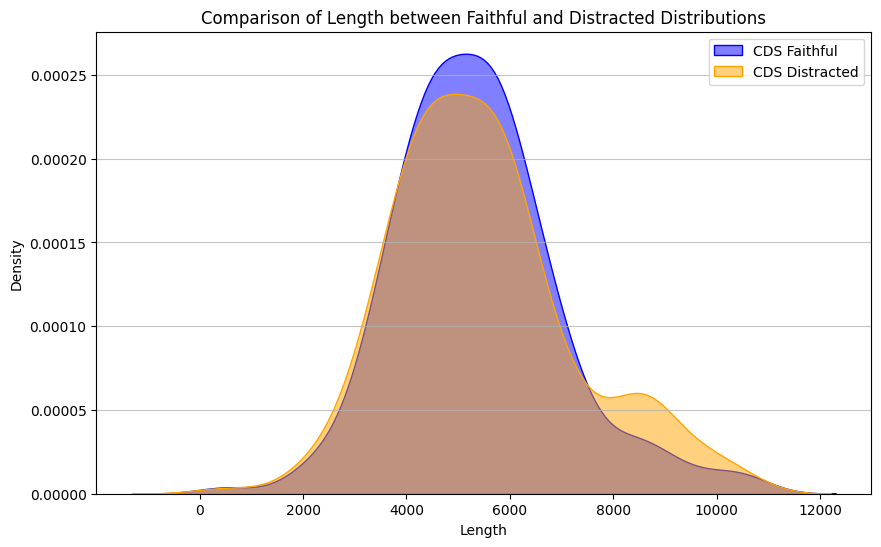

Correlation(len_diff, cds_diff): 0.3848
⚠️ 길이 차이가 CDS 차이에 의미 있는 영향을 줄 가능성이 있음.
Correlation(len_f, cds_f): 0.3439
⚠️ 길이 차이가 CDS 차이에 의미 있는 영향을 줄 가능성이 있음.
Correlation(len_d, cds_d): 0.4403
⚠️ 길이 차이가 CDS 차이에 의미 있는 영향을 줄 가능성이 있음.


In [13]:
# 길이 비교
t_stat, p_val = stats.ttest_rel(df['len_faithful'], df['len_distracted'])
print("\n" + "="*50)
print("📊 [Phase 1] Quantitative Results by length")
print("="*50)
print(f"Mean len (Faithful):     {df['len_faithful'].mean():.4f} (std: {df['len_faithful'].std():.4f})")
print(f"Mean len (Distracted): {df['len_distracted'].mean():.4f} (std: {df['len_distracted'].std():.4f})")
print(f"Gap (Faithful - Distracted): {df['len_diff'].mean():.4f}")
print("-" * 50)
print(f"Statistical Significance (Paired T-test):")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value:     {p_val:.4e}")
if p_val < 0.05:
    print("✅ Result: Statistically Significant (p < 0.05)")
else:
    print("❌ Result: Not Significant")

plt.figure(figsize=(10, 6))
sns.kdeplot(df['len_faithful'], label='CDS Faithful', fill=True, color='blue', alpha=0.5)
sns.kdeplot(df['len_distracted'], label='CDS Distracted', fill=True, color='orange', alpha=0.5)
plt.title('Comparison of Length between Faithful and Distracted Distributions')
plt.xlabel('Length')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

def corr_len_cds_(corr_):
  cc7=0.7; cc5=0.5; cc3=0.3
  if abs(corr_) > cc7:
      print("⚠️ 길이 차이가 CDS 차이에 강력한 영향을 줄 가능성이 있음.")
  if abs(corr_) > cc5:
      print("⚠️ 길이 차이가 CDS 차이에 중간 영향을 줄 가능성이 있음.")
  elif abs(corr_) > cc3:
      print("⚠️ 길이 차이가 CDS 차이에 의미 있는 영향을 줄 가능성이 있음.")
  else:
      print("ℹ️ 길이 차이의 영향은 크지 않은 것으로 보임.")

corr_len_cds = df['len_diff'].corr(df['diff'])
print(f"Correlation(len_diff, cds_diff): {corr_len_cds:.4f}")
corr_len_cds_(corr_len_cds)
corr_faithful = df['len_faithful'].corr(df['cds_faithful'])
print(f"Correlation(len_f, cds_f): {corr_faithful:.4f}")
corr_len_cds_(corr_faithful)
corr_distracted = df['len_distracted'].corr(df['cds_distracted'])
print(f"Correlation(len_d, cds_d): {corr_distracted:.4f}")
corr_len_cds_(corr_distracted)


📊 [Phase 1] Quantitative Results
Mean CDS (Faithful):     0.5478 (std: 0.0996)
Mean CDS (Distracted): 0.5374 (std: 0.1067)
Gap (Faithful - Distracted): 0.0104
--------------------------------------------------
Statistical Significance (Paired T-test):
T-statistic: 1.0427
P-value:     2.9835e-01
❌ Result: Not Significant


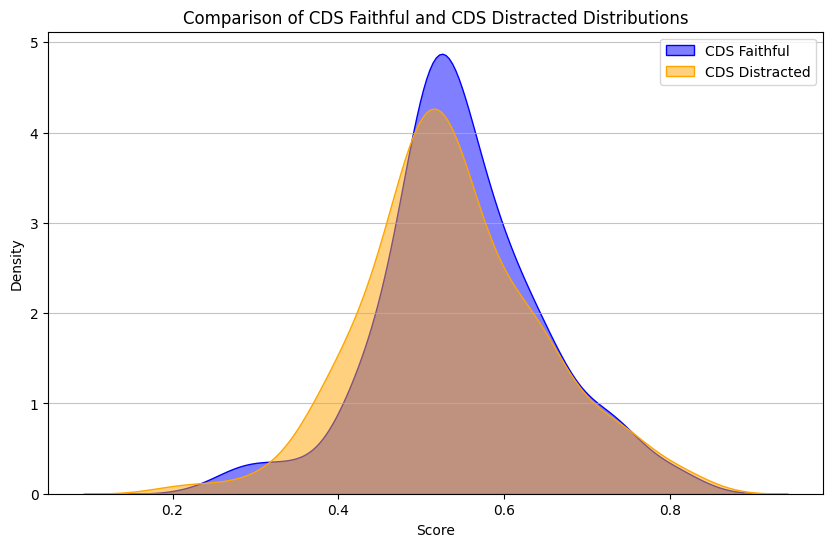

✅ Figure 1 Saved.


In [11]:
# CDS 비교
t_stat, p_val = stats.ttest_rel(df['cds_faithful'], df['cds_distracted'])
print("\n" + "="*50)
print("📊 [Phase 1] Quantitative Results")
print("="*50)
print(f"Mean CDS (Faithful):     {df['cds_faithful'].mean():.4f} (std: {df['cds_faithful'].std():.4f})")
print(f"Mean CDS (Distracted): {df['cds_distracted'].mean():.4f} (std: {df['cds_distracted'].std():.4f})")
print(f"Gap (Faithful - Distracted): {df['diff'].mean():.4f}")
print("-" * 50)
print(f"Statistical Significance (Paired T-test):")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value:     {p_val:.4e}")
if p_val < 0.05:
    print("✅ Result: Statistically Significant (p < 0.05)")
else:
    print("❌ Result: Not Significant")

plt.figure(figsize=(10, 6))
sns.kdeplot(df['cds_faithful'], label='CDS Faithful', fill=True, color='blue', alpha=0.5)
sns.kdeplot(df['cds_distracted'], label='CDS Distracted', fill=True, color='orange', alpha=0.5)
plt.title('Comparison of CDS Faithful and CDS Distracted Distributions')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()
file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/fig1_Comparison_Distributions.png"
#plt.savefig(file_name, dpi=300)
print("✅ Figure 1 Saved.")

In [15]:
import json
file_name = "/content/drive/MyDrive/ColabNotebooks/results/CDS/Qwen3-0.6B_hotpot_qa_best_results.json"
with open(file_name, 'r') as f:
    best_result = json.load(f)

# Convert the loaded lists back to numpy arrays if they are intended to be used as such later
best_result['attn_f'] = np.array(best_result['attn_f'])
best_result['attn_h'] = np.array(best_result['attn_h'])

type(best_result['attn_f']), len(best_result['attn_f']), best_result['attn_f'][0]

(numpy.ndarray, 1231, array([1., 0., 0., ..., 0., 0., 0.]))

##### 시각화


✅ Figure 1 Saved.
✅ Figure 2 Saved.


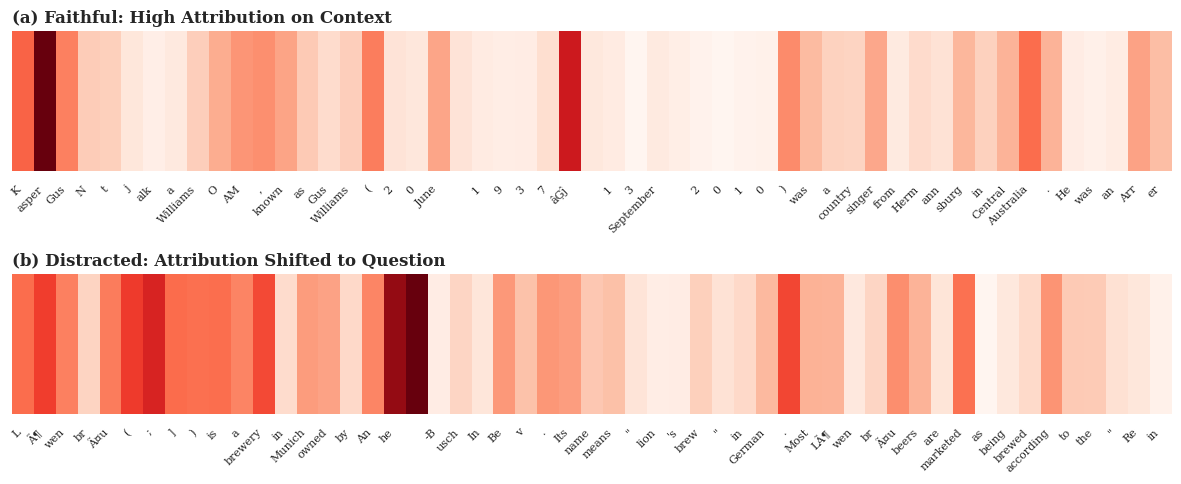

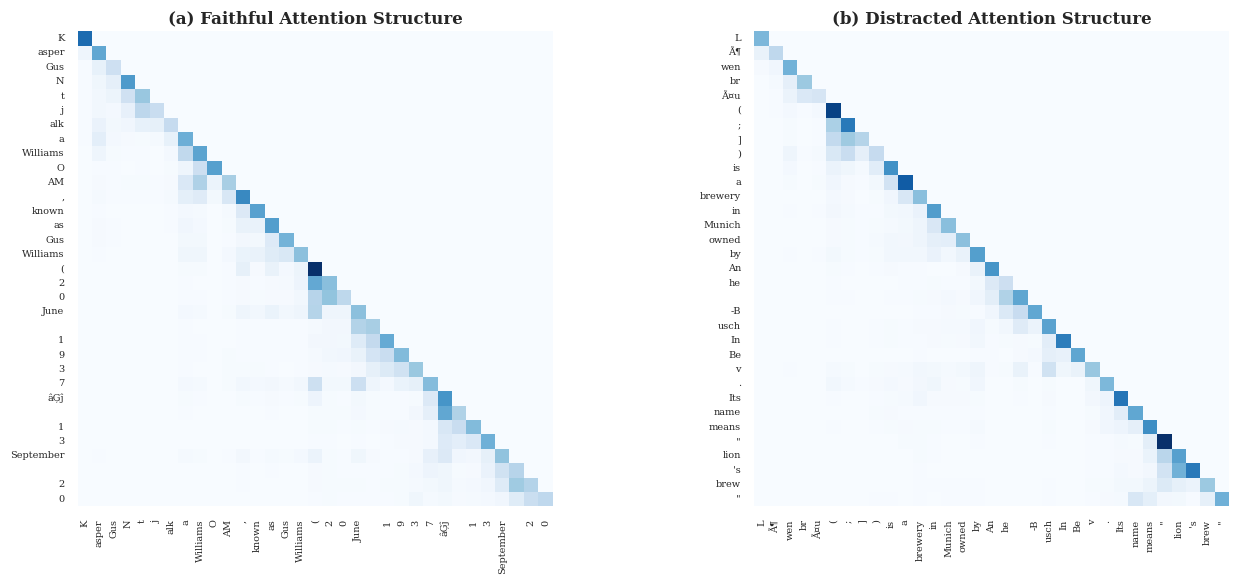

In [32]:
# ==========================================
# 4. 정성 분석 시각화 (Figure 1 & 2)
# ==========================================
if best_viz_candidate:
    sns.set_theme(style="white")
    plt.rcParams['font.family'] = 'serif'
    # --- Figure 1: Heatmap Comparison (Intensity) ---
    fig1, axes = plt.subplots(2, 1, figsize=(12, 5))

    def draw_heatmap(ax, tokens, scores, title):
      limit = 60
      clean = [t.replace(' ', '').replace('Ġ', '').replace('<', '').replace('>', '').replace('|', '').replace('user', '').replace('Context', '') for t in tokens if t != ''][7:limit]
      vals = np.array(scores)[7:limit].reshape(1, -1)
      vals = (vals - vals.min()) / (vals.max() - vals.min() + 1e-9) # Normalize

      sns.heatmap(vals, xticklabels=clean, yticklabels=False, cmap="Reds", ax=ax, cbar=False)
      ax.set_title(title, loc='left', fontsize=12, fontweight='bold')
      ax.set_xticklabels(clean, rotation=45, ha='right', fontsize=8)

    draw_heatmap(axes[0], best_viz_candidate['tok_f'], best_viz_candidate['score_f'], "(a) Faithful: High Attribution on Context")
    draw_heatmap(axes[1], best_viz_candidate['tok_h'], best_viz_candidate['score_h'], "(b) Distracted: Attribution Shifted to Question")

    plt.tight_layout()
    plt.savefig("fig1_heatmap.png", dpi=300)
    print("✅ Figure 1 Saved.")

    # --- Figure 2: Attention Map Comparison (Structure) ---
    # 어텐션 맵은 N x N 이므로 잘라서(Crop) 보여주는 것이 좋음
    fig2, axes = plt.subplots(1, 2, figsize=(14, 6))

    def draw_attn_map(ax, tokens, attn_mat, title):
      limit = 40 # 40x40 토큰만 시각화 (가독성 위함)
      clean = [t.replace(' ', '').replace('Ġ', '').replace('<', '').replace('>', '').replace('|', '').replace('user', '').replace('Context', '') for t in tokens if t != ''][7:limit]
      mat = attn_mat[7:limit, 7:limit]

      sns.heatmap(mat, xticklabels=clean, yticklabels=clean, cmap="Blues", ax=ax, cbar=False, square=True)
      ax.set_title(title, fontsize=12, fontweight='bold')
      ax.tick_params(axis='x', rotation=90, labelsize=7)
      ax.tick_params(axis='y', rotation=0, labelsize=7)

    draw_attn_map(axes[0], best_viz_candidate['tok_f'], best_viz_candidate['attn_f'], "(a) Faithful Attention Structure")
    draw_attn_map(axes[1], best_viz_candidate['tok_h'], best_viz_candidate['attn_h'], "(b) Distracted Attention Structure")

    plt.tight_layout()
    plt.savefig("fig2_attention_map.png", dpi=300)
    print("✅ Figure 2 Saved.")

In [31]:
best_result['f']

'Kasper Gus Ntjalka Williams OAM, known as Gus Williams (20 June 1937 – 13 September 2010) was a country singer from Hermannsburg in Central Australia. He was an Arrernte man, who was born in Alice Springs. He was the father of country star Warren H Williams. Kasper Hvidt (born 6 February 1976 in Copenhagen) is a Danish retired handball goalkeeper, who lastly played for KIF Kolding and previous Danish national team. He was selected as the best keeper for the 2008 European Men\'s Handball Championship. Hvidt was also voted as Goalkeeper of the Year March 20, 2009, second place was Thierry Omeyer from France. Peter Bolesław Schmeichel MBE (] ; born 18 November 1963) is a Danish former professional footballer who played as a goalkeeper, and was voted the IFFHS World\'s Best Goalkeeper in 1992 and 1993. He is best remembered for his most successful years at English club Manchester United, whom he captained to the 1999 UEFA Champions League to complete the Treble, and for winning UEFA Euro 

In [30]:
best_result['q']

'What was the father of Kasper Schmeichel voted to be by the IFFHS in 1992?'

In [29]:
best_result['d']

'Löwenbräu ( ; ] ) is a brewery in Munich owned by Anheuser-Busch InBev. Its name means "lion\'s brew" in German. Most Löwenbräu beers are marketed as being brewed according to the "Reinheitsgebot", the Bavarian beer purity regulation of 1516. The Bürgerbräukeller was a large beer hall located in Munich, Germany. Opened in 1885, it was one of the largest beer halls of the Bürgerliches Brauhaus company, a 19th-century brewery. After Bürgerliches merged with Löwenbräu in 1921, the hall was transferred to that company.'


🎨 Generating Figure 1 from Sample ID (Best Gap)...
✅ Saved 'phase1_figure1_heatmap.png'

🎉 Phase 1 Experiment Complete.


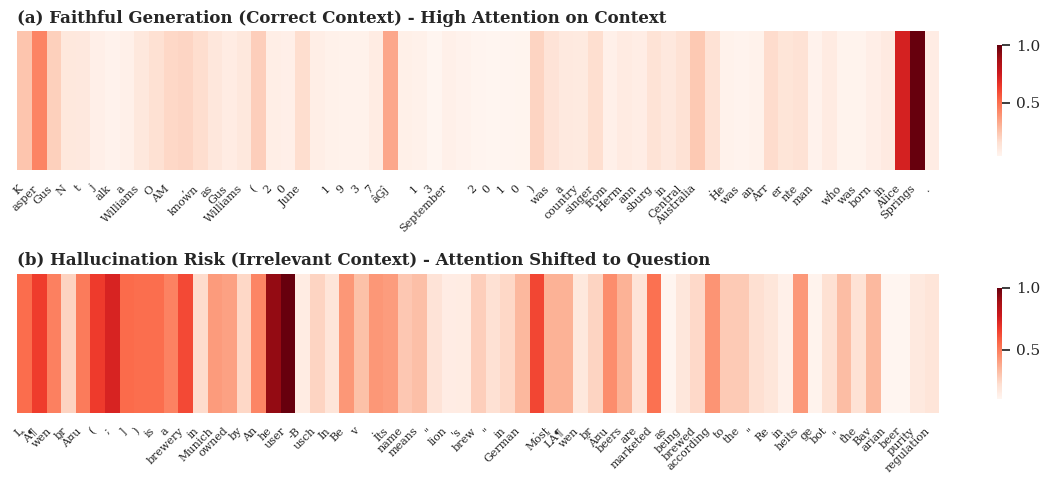

In [33]:
# ==========================================
# 4. 정성 분석: Figure 1 히트맵 생성
# ==========================================
if best_viz_candidate:
    print(f"\n🎨 Generating Figure 1 from Sample ID (Best Gap)...")

    sns.set_theme(style="white")
    plt.rcParams['font.family'] = 'serif'
    fig, axes = plt.subplots(2, 1, figsize=(12, 5), sharex=False)
    def draw_row(ax, tokens, scores, title):
        # 시각화 길이 제한
        limit = 70
        clean_toks = [t.replace(' ', '').replace('Ġ', '') for t in tokens][7:limit]
        norm_scores = np.array(scores)[7:limit]
        # 정규화
        if norm_scores.max() > 0:
            norm_scores /= norm_scores.max()
        sns.heatmap(
            norm_scores.reshape(1, -1),
            xticklabels=clean_toks, yticklabels=False,
            cmap="Reds", ax=ax, cbar=True,
            cbar_kws={"orientation": "vertical", "shrink": 0.8}
        )
        ax.set_title(title, fontsize=12, fontweight='bold', loc='left')
        ax.set_xticklabels(clean_toks, rotation=45, ha='right', fontsize=8)
    draw_row(axes[0], best_viz_candidate['tok_f'], best_viz_candidate['score_f'],
             f"(a) Faithful Generation (Correct Context) - High Attention on Context")
    draw_row(axes[1], best_viz_candidate['tok_h'], best_viz_candidate['score_h'],
             f"(b) Hallucination Risk (Irrelevant Context) - Attention Shifted to Question")

    plt.tight_layout()
    plt.savefig("phase1_figure1_heatmap.png", bbox_inches='tight', dpi=300)
    print("✅ Saved 'phase1_figure1_heatmap.png'")

print("\n🎉 Phase 1 Experiment Complete.")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display

import re

def clean_token(tok):
    """
    불필요한 BPE 토큰 접두어(Ġ, Ċ, ▁ 등)와 특수문자를 제거/정리하는 함수.
    """

    # 1. BPE prefix 제거
    tok = tok.replace("Ġ", " ")      # GPT-2 계열 공백 토큰
    tok = tok.replace("Ċ", " ")      # Line-break 계열
    tok = tok.replace("▁", " ")      # SentencePiece 공백

    # 2. HTML-safe 처리 (원하는 경우)
    tok = tok.replace("&", "&amp;").replace("<", "&lt;").replace(">", "&gt;")

    # 3. 양쪽 공백 제거
    tok = tok.strip()

    # 4. 특수문자 클린업 (문장부호는 유지)
    tok = re.sub(r"[^A-Za-z0-9가-힣 ,.?!%:/\-_=+()]", "", tok)

    # 5. 다시 한 번 trim
    tok = tok.strip()

    return tok if tok != "" else " "

def split_tokens_to_sentences(tokens, scores):
    sentences = []
    curr_toks = []
    curr_scores = []

    end_tokens = [".", "?", "!"]

    for t, s in zip(tokens, scores):
        curr_toks.append(t)
        curr_scores.append(s)

        if t in end_tokens or t.endswith(tuple(end_tokens)):
            sentences.append((curr_toks, curr_scores))
            curr_toks, curr_scores = [], []

    if curr_toks:
        sentences.append((curr_toks, curr_scores))

    return sentences


def html_color_sentence(tokens, scores, color):
    """
    하나의 문장을 HTML 컬러 span으로 변환
    """
    html = ""
    for t, s in zip(tokens, scores):
        t_clean = clean_token(t)
        html += f"<span style='background-color:{color}; padding:2px; margin:1px; border-radius:4px;'>{t_clean}</span> "
    return html


def visualize_sentence_html_interactive(tokens, scores, sep_idx, top_k=3):
    scores = np.array(scores)

    #---------------------------
    # 1. Context / Question 분리
    #---------------------------
    context_tokens = tokens[:sep_idx]
    context_scores = scores[:sep_idx]

    question_tokens = tokens[sep_idx:]
    question_scores = scores[sep_idx:]

    #---------------------------
    # 2. Context 문장 단위
    #---------------------------
    sentences = split_tokens_to_sentences(context_tokens, context_scores)
    sentence_scores = np.array([sum(s[1]) for s in sentences])

    # Top-K 문장 선택
    if len(sentence_scores) > 0:
        top_indices = np.argsort(sentence_scores)[-top_k:]
    else:
        top_indices = []

    # Normalize for colormap
    if len(sentence_scores) > 0:
        norm = (sentence_scores - sentence_scores.min()) / (sentence_scores.max() - sentence_scores.min() + 1e-8)
    else:
        norm = []

    cmap = plt.cm.get_cmap("coolwarm")

    #---------------------------
    # 3. HTML 생성
    #---------------------------
    html_output = "<h3>Sentence-level IG Highlight (Context Top-{}</h3>".format(top_k)
    html_output += "<div style='font-size: 16px; line-height: 2;'>"

    # Context 출력
    i=0
    html_output += "<h4>Context (Top Sentences Highlighted)</h4>"
    for idx, (sent_tokens, sent_scores) in enumerate(sentences):
        if idx in top_indices and i<3:
            i = i+1
            # 중요 문장 → 컬러맵 기반 강조
            rgba = cmap(norm[idx])
            color = f"rgba({int(rgba[0]*255)}, {int(rgba[1]*255)}, {int(rgba[2]*255)}, 0.6)"
        else:
            # 비중요 문장 → 회색
            color = "rgba(200,200,200,0.3)"

        if idx in top_indices:
            html_output += html_color_sentence(sent_tokens, sent_scores, color)
            html_output += "<br><br>"

    # Question 출력
    html_output += "<h4>Question</h4>"
    for t, s in zip(question_tokens, question_scores):
        t_clean = clean_token(t)
        html_output += f"<span style='background-color:rgba(255,150,150,0.7); padding:2px; margin:1px; border-radius:4px;'>{t_clean}</span> "
    html_output += "</div>"

    display(HTML(html_output))

    #---------------------------
    # 4. 그래프: Top-K 문장만 표시
    #---------------------------
    plt.figure(figsize=(18, 5))

    x_pos = 0
    xticks = []
    xlabels = []

    for idx in top_indices:
        sent_tokens, sent_scores = sentences[idx]
        clean_tokens = []
        for t in sent_tokens:
            clean_tokens.append(clean_token(t))
        xs = np.arange(x_pos, x_pos + len(clean_tokens))

        rgba = cmap(norm[idx])
        color = (rgba[0], rgba[1], rgba[2], 0.8)

        plt.bar(xs, sent_scores, color=color)

        xticks.extend(xs)
        xlabels.extend(clean_tokens)
        x_pos += len(sent_tokens)

    plt.title(f"Top {top_k} Context Sentences (Token-Level IG Scores)")
    plt.xticks(xticks, xlabels, rotation=90)
    plt.xlabel("Tokens")
    plt.ylabel("Attribution Score")
    plt.tight_layout()
    plt.show()



# 예시 실행
# tokens, scores, cds, raw_attn = get_phi3_token_importance(context, question, model, tokenizer)
sep_idx = next(i for i, t in enumerate(best_viz_candidate['tok_f']) if "Question" in t)
visualize_sentence_html_interactive(best_viz_candidate['tok_f'], best_viz_candidate['score_f'], sep_idx, top_k=5)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
with open('/content/drive/MyDrive/ColabNotebooks/datasets/phase1_experiment_results.csv', 'r') as f:
    df = pd.read_csv(f)

plt.figure(figsize=(10, 6))
sns.kdeplot(df['cds_faithful'], label='CDS Faithful', fill=True, color='blue', alpha=0.5)
sns.kdeplot(df['cds_distracted'], label='CDS Distracted', fill=True, color='orange', alpha=0.5)
plt.title('Comparison of CDS Faithful and CDS Distracted Distributions')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()